# This is Colab Notebook (ipynb) of  the **GDSC Machine Learning Hackathon** for **Team Lifergy**

## This Notebook include the Power Consumption Model capable of estimating energy consumed, taking into consideration the power source (Grid, Generator, Battery) as per the configurations in Appendix B. The model. It uses the EAJ0001C  Hub Site Datasets


### Team Members include:
*   Aberejo Habeeblah O. (Team Lead)
*   Aina Ogechukwu (Query Analyst)
*   Raheem David
*   Micheal  Ezeane

# Data Loading

In [1]:
!pip install pandas
import pandas as pd

!pip install numpy
import numpy as np

!pip install matplotlib
import matplotlib.pyplot as plt

!pip install seaborn
import seaborn as sns

# ARIMA functions and libraries imported here
!pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA

!pip install scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# For prophet algorithms Model
!pip install pystan==2.19.1.1
!pip install fbprophet
!pip install prophet
from prophet import Prophet

# For Extreme Gradient Boost Model
!pip install xgboost
from xgboost import XGBRegressor

# for evaluation
from math import sqrt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  ERROR: Command errored out with exit status 1:
   command: /home/studio-lab-user/.conda/envs/default/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-euzzs4xl/fbprophet_45622efbabb54f26b9fbd49b30efa740/setup.py'"'"'; __file__='"'"'/tmp/pip-install-euzzs4xl/fbprophet_45622efbabb54f26b9fbd49b30efa740/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-fz59bktt
       cwd: /tmp/pip-install-euzzs4xl/fbprophet_45622efbabb54f26b9fbd49b30efa740/
  Complete output (56 lines):
  /tmp/pip-install-euzzs4xl/fbprophet_45622efbabb54f26b9fbd49b30efa740/setup.py:10: DeprecationWarning: pkg_resources is d

Importing plotly failed. Interactive plots will not work.


In [2]:
import pandas as pd
import os
from io import StringIO

# Install wget if not already installed
!pip install wget

# Function to download file from Google Drive
def download_from_drive(gdrive_id):
    # Construct the download link
    download_link = f"https://drive.google.com/uc?id={gdrive_id}"

    # Use wget to download the file and return content
    return os.popen(f"wget --quiet --no-check-certificate -O - '{download_link}'").read()

# Specifying the hackathon dataset link
dataset_links = [
    '1HXVXS1ODeKxxTH-0N_uFYZhJ_dxgpcY9',  # file ID for file 1
    '1Ekv0VZaqsVgxf5D3AdNtQHnnWS-Cje9c',  # file ID for file 2
    '1goA3or-Cfk6zHF_ooqdSUObl9aUqTwu6',  # file ID for file 3
    '12cVx7OV-jqvcYWlPMMZZoj5ND6erq2El'   # file ID for file 4
]

# Download and read datasets
data_df1 = pd.read_csv(StringIO(download_from_drive(dataset_links[0])), header=None, skiprows=[0, 1, 2])
data_df2 = pd.read_csv(StringIO(download_from_drive(dataset_links[1])), header=None, skiprows=[0, 1, 2])
data_df3 = pd.read_csv(StringIO(download_from_drive(dataset_links[2])), header=None, skiprows=[0, 1, 2])
data_df4 = pd.read_csv(StringIO(download_from_drive(dataset_links[3])), header=None, skiprows=[0, 1, 2])

# Display the first few rows of the data
print(data_df1.head())
print(data_df2.head())
print(data_df3.head())
print(data_df4.head())


                   0    1           2    3     4     5    6    7    8    9    \
0  2023-08-28 16:05:21  0.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
1  2023-08-28 16:06:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
2  2023-08-28 16:07:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
3  2023-08-28 16:08:21  1.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   
4  2023-08-28 16:09:21  2.0  Not active  NaN  Open  Open  NaN  NaN  NaN  NaN   

   ...   103    104   105  106  107       108       109   110  111      112  
0  ...  78.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
1  ...  79.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
2  ...  76.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
3  ...  82.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  
4  ...  76.0  100.0  idle  0.0  NaN  No alarm  No alarm  Grid  NaN  Grid ok  

[5 rows x 113 columns]
                   0    1  

In [3]:
loading_locally = '''
# For the same of loading locally
download_link_1 = 'EAJ0001C/0_EAJ0001C_log_20230430-1605_to_20230629-1605.csv'
download_link_2 = 'EAJ0001C/0_EAJ0001C_log_20230629-1605_to_20230828-1605.csv'
download_link_3 = 'EAJ0001C/0_EAJ0001C_log_20230828-1605_to_20231027-1605.csv'
download_link_4 = 'EAJ0001C/0_EAJ0001C_log_20231027-1605_to_20231030-1604.csv'


data_df1 = pd.read_csv(download_link_1, header = None, skiprows = [0,1,2])
data_df2 = pd.read_csv(download_link_2, header = None, skiprows = [0,1,2])
data_df3 = pd.read_csv(download_link_3, header = None, skiprows = [0,1,2])
data_df4 = pd.read_csv(download_link_4, header = None, skiprows = [0,1,2])'''

# Data Preprocessing and cleaning

In [4]:
# Display the shape of the DataFrame and total null
print(f'For data with adjusted heading, shape is {data_df1.shape}, total no of null is {data_df1.isnull().sum().sum()}')
print(f'For data with adjusted heading, shape is {data_df2.shape}, total no of null is {data_df2.isnull().sum().sum()}')
print(f'For data with adjusted heading, shape is {data_df3.shape}, total no of null is {data_df3.isnull().sum().sum()}')
print(f'For data with adjusted heading, shape is {data_df4.shape}, total no of null is {data_df4.isnull().sum().sum()}')

For data with adjusted heading, shape is (90186, 113), total no of null is 2734783
For data with adjusted heading, shape is (89708, 107), total no of null is 2217606
For data with adjusted heading, shape is (88733, 109), total no of null is 2447560
For data with adjusted heading, shape is (4455, 95), total no of null is 53972


With the result from this, my datasets shape, they have different number of columns meaning they have differnt columns. I will only be working on common columns

In [5]:
# Specifying the row indices i am loading
rows_to_load = [0, 1, 2]

# Load the specific rows into a DataFrame, i.e rows specified in the list above
data_head_df1 = pd.read_csv(StringIO(download_from_drive(dataset_links[0])), header = None, skiprows=lambda x: x not in rows_to_load)
data_head_df2 = pd.read_csv(StringIO(download_from_drive(dataset_links[1])), header = None, skiprows=lambda x: x not in rows_to_load)
data_head_df3 = pd.read_csv(StringIO(download_from_drive(dataset_links[2])), header = None, skiprows=lambda x: x not in rows_to_load)
data_head_df4 = pd.read_csv(StringIO(download_from_drive(dataset_links[3])), header = None, skiprows=lambda x: x not in rows_to_load)

# TO get a view of the 1st head datasets
data_head_df1.head()

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,timestamp,Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],...,System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [261]
1,Africa/Lagos (+01:00),VRM Log time offset,ESS Scheduled Charging,Grid setpoint,Relay 1 state,CCGX Relay 2 state,Relay 1 function,Relay 2 function,Whether system accepts Dynamic ESS instructions.,Minimum battery SOC below which selling always...,...,VE.Bus charge power,Battery SOC,Battery state,Battery Consumed Amphours,Battery Time to Go,DVCC Multiple batteries alarm,GX Error #48 DVCC with incompatible firmware,AC-Input,Consumption Forecast,Grid alarm
2,NaN,s,NaN,W,NaN,NaN,NaN,NaN,NaN,%,...,W,%,NaN,Ah,h,NaN,NaN,NaN,Wh,NaN


From the view above, my head dataset need lots of refinement, i will creat a user defined function below to handle that

In [6]:
# Here i adjust the row with the unit column by inserting it in bracket to meet standard and quick recognition as i move ahead
def header_writer(data_df = '', data_head_df = ''):
    '''This functions prepares by header file by
    1. Add () to the 3rd row of the datasets making it look like a unit
    2. Join the forst 3 rows found the in head dataset
    3. After changes, make the new created column for head the head of the dataset'''
    b_bracket = '('
    a_bracket= ')'
    data_head_df.iloc[2] = data_head_df.iloc[2].apply(lambda x: f"{b_bracket}{x}{a_bracket}" if pd.notna(x) else x)
    # i then filled empty cells on the row with just whitespace, this will aid in my joining of the rows later
    data_head_df.iloc[2] = data_head_df.iloc[2].fillna(' ')
    new_row_for_header = data_head_df.iloc[0:3].apply(lambda x: '. '.join(x), axis = 0)
    data_head_df.loc[2] = new_row_for_header
    # TO reset my index after all adjtment
    data_head_df.reset_index(drop=True, inplace = True)
    data_head_df.iloc[0] = data_head_df.iloc[2] # Assigning row index 2 as my column i.e as header
    data_head_df.reset_index(drop=True, inplace = True)

    data_df.columns = data_head_df.iloc[2]
    # From above, i noticed my header is assigned index 2 because of how i handled it from the row, so now, lets remove
    #data_df.columns = data_head_df.columns.set_names(None)
    A_data_df = data_df
    return data_df

In [7]:
header_writer(data_df1, data_head_df1)
data_df1.columns = data_df1.columns.set_names(None)
data_df1.head(10)

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Grid setpoint. (W),Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,Gateway [0]. Relay 1 function.,Gateway [0]. Relay 2 function.,Gateway [0]. Whether system accepts Dynamic ESS instructions..,Gateway [0]. Minimum battery SOC below which selling always stops. (%),...,System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [0]. Consumption Forecast. (Wh),System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,78.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
1,2023-08-28 16:06:21,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,79.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
2,2023-08-28 16:07:21,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
3,2023-08-28 16:08:21,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,82.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4,2023-08-28 16:09:21,2.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
5,2023-08-28 16:09:56,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,68.0,100.0,discharging,0.0,136.47,No alarm,No alarm,Grid,NaN,Grid ok
6,2023-08-28 16:09:57,0.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,68.0,100.0,discharging,0.0,59.08,No alarm,No alarm,Grid,NaN,Grid ok
7,2023-08-28 16:09:58,2.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,-1609.0,100.0,discharging,-0.1,37.12,No alarm,No alarm,Inverting,NaN,Grid ok
8,2023-08-28 16:10:21,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,-3526.0,99.8,discharging,-0.6,5.23,No alarm,No alarm,Inverting,NaN,Grid ok
9,2023-08-28 16:10:33,1.0,Not active,NaN,Open,Open,NaN,NaN,NaN,NaN,...,-3539.0,99.7,discharging,-0.8,4.07,No alarm,No alarm,Inverting,NaN,Grid ok


In [8]:
header_writer(data_df2, data_head_df2) # FOr second dataset
data_df2.columns = data_df2.columns.set_names(None)

# FOr third dataset
header_writer(data_df3, data_head_df3)
data_df3.columns = data_df3.columns.set_names(None)

# FOr forth dataset
header_writer(data_df4, data_head_df4)
data_df4.columns = data_df4.columns.set_names(None)
data_df4.head(6)

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,Gateway [0]. Actual working state of Dynamic ESS.,Gateway [0]. Dynamic ESS error code.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),...,System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [0]. Consumption Forecast. (Wh),System overview [261]. Grid alarm.
0,2023-10-27 16:05:51,1.0,Not active,Open,Open,Off,No error,Ok,222.7,16.9,...,66.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
1,2023-10-27 16:06:51,1.0,Not active,Open,Open,Off,No error,Ok,223.5,14.8,...,70.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
2,2023-10-27 16:07:51,1.0,Not active,Open,Open,Off,No error,Ok,223.5,15.9,...,66.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
3,2023-10-27 16:08:51,2.0,Not active,Open,Open,Off,No error,Ok,223.5,13.2,...,66.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
4,2023-10-27 16:09:51,2.0,Not active,Open,Open,Off,No error,Ok,223.5,13.2,...,67.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok
5,2023-10-27 16:10:51,0.0,Not active,Open,Open,Off,No error,Ok,222.7,14.8,...,69.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,NaN,Grid ok


In [9]:
# Because of the preprocessing done in the header and tlater adding to the rows of the dataset
# in some cases, the datatype of every column changes of object (even with columns with fint and flost)
# So, lets chreck the datasets of every columns
data_df1.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                   float64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Grid setpoint. (W)                                         float64
Gateway [0]. Relay 1 state.                                              object
                                                                         ...   
System overview [0]. DVCC Multiple batteries alarm.                      object
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [0]. Consumption Forecast. (Wh)                         float64
System overview [261]. Grid alarm.                                       object
Length: 113, dtype: object

In [10]:
data_df2.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                     int64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Grid setpoint. (W)                                         float64
Gateway [0]. Relay 1 state.                                              object
                                                                         ...   
System overview [0]. Battery Time to Go. (h)                            float64
System overview [0]. DVCC Multiple batteries alarm.                      object
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [261]. Grid alarm.                                       object
Length: 107, dtype: object

In [11]:
data_df3.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                   float64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Grid setpoint. (W)                                         float64
Gateway [0]. Relay 1 state.                                              object
                                                                         ...   
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [261]. Grid alarm.                                       object
Temperature sensor [23]. Temperature status.                             object
Temperature sensor [24]. Temperature status.                             object
Length: 109, dtype: object

In [12]:
data_df4.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                   float64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Relay 1 state.                                              object
Gateway [0]. CCGX Relay 2 state.                                         object
                                                                         ...   
System overview [0]. DVCC Multiple batteries alarm.                      object
System overview [0]. GX Error #48 DVCC with incompatible firmware.       object
System overview [0]. AC-Input.                                           object
System overview [0]. Consumption Forecast. (Wh)                         float64
System overview [261]. Grid alarm.                                       object
Length: 95, dtype: object

In [13]:
# Getting the columns
columns_df1 = set(data_df1.columns)
columns_df2 = set(data_df2.columns)
columns_df3 = set(data_df3.columns)
columns_df4 = set(data_df4.columns)

# Find the common columns using the intersection of sets
common_columns = columns_df1.intersection(columns_df2, columns_df3, columns_df4)

# Convert the result back to a list if needed
common_columns_list = list(common_columns)

# Display the common columns
print(f'Common Columns from the dataset are :{common_columns_list}. \n their total is {len(common_columns_list)}')


Common Columns from the dataset are :['Gateway [0]. CCGX Relay 2 state.  ', 'System overview [0]. Voltage. (V)', 'VE.Bus System [261]. Active input current limit. (A)', 'VE.Bus System [261]. Input voltage phase 1. (V)', 'VE.Bus System [261]. Temperature L3.  ', 'System overview [0]. #6 Charge disabled by user setting.  ', 'VE.Bus System [261]. Ignore AC input.  ', 'VE.Bus System [261]. Overload L3.  ', 'Battery Monitor [260]. Current. (A)', 'VE.Bus System [261]. Low battery L3.  ', 'VE.Bus System [261]. Ignore AC input 2.  ', 'System overview [0]. DVCC Multiple batteries alarm.  ', 'VE.Bus System [261]. Input frequency 1. (Hz)', 'Battery Monitor [260]. Low state-of-charge alarm.  ', 'System overview [0]. Battery SOC. (%)', 'Battery Monitor [260]. Total Ah drawn. (Ah)', 'VE.Bus System [261]. High DC Ripple L3.  ', 'VE.Bus System [261]. Current. (A)', 'VE.Bus System [261]. Low battery L2.  ', 'System overview [0]. AC-Input.  ', 'System overview [0]. Current. (A)', 'timestamp. Africa/Lago

In [14]:
#creating a function to drop columns not common between all the dataset
def drop_common_columns(data_df, common_columns_list):
    columns_to_drop = [column for column in data_df.columns if column not in common_columns_list]
    data_df.drop(columns=columns_to_drop, inplace=True)
    return data_df

In [15]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df1,common_columns_list)

data_df1.shape

(90186, 92)

In [16]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df2,common_columns_list)

data_df2.shape

(89708, 92)

In [17]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df3,common_columns_list)

data_df3.shape

(88733, 92)

In [18]:
# Calling function that will drop all column that are not in other dataset
drop_common_columns(data_df4,common_columns_list)

data_df4.shape

(4455, 92)

In [19]:
#lets join our three dataset together
data_df = pd.concat([data_df1,data_df2,data_df3,data_df4])
data_df.head()

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),...,System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,Not active,Open,Open,Ok,217.6,19.0,50.36,3789.0,...,11.366,78.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
1,2023-08-28 16:06:21,1.0,Not active,Open,Open,Ok,216.0,20.6,50.36,4066.0,...,11.364,79.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
2,2023-08-28 16:07:21,1.0,Not active,Open,Open,Ok,216.8,19.0,50.36,4023.0,...,11.362,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
3,2023-08-28 16:08:21,1.0,Not active,Open,Open,Ok,217.6,16.4,50.36,4177.0,...,11.362,82.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok
4,2023-08-28 16:09:21,2.0,Not active,Open,Open,Ok,217.6,17.5,50.10,3893.0,...,11.362,76.0,100.0,idle,0.0,NaN,No alarm,No alarm,Grid,Grid ok


In [20]:
data_df.shape

(273082, 92)

In [21]:
pd.set_option('display.max_columns', None)

data_df.head()

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input.,VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,2023-08-28 16:05:21,0.0,Not active,Open,Open,Ok,217.6,19.0,50.36,3789.0,217.6,18.0,50.1,3711.0,56.5,1.1,AC Input 2,32.0,32.0,32.0,Absorption,No error,On,Ok,Ok

In [22]:
pd.set_option('display.max_columns', None)

print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 273082 entries, 0 to 4454
Data columns (total 92 columns):
 #   Column                                                                Non-Null Count   Dtype  
---  ------                                                                --------------   -----  
 0   timestamp. Africa/Lagos (+01:00).                                     273082 non-null  object 
 1   Gateway [0]. VRM Log time offset. (s)                                 271578 non-null  float64
 2   Gateway [0]. ESS Scheduled Charging.                                  271575 non-null  object 
 3   Gateway [0]. Relay 1 state.                                           271569 non-null  object 
 4   Gateway [0]. CCGX Relay 2 state.                                      271569 non-null  object 
 5   VE.Bus System [261]. Phase rotation.                                  271558 non-null  object 
 6   VE.Bus System [261]. Input voltage phase 1. (V)                       271509 non-null  floa

In [23]:
def null_counter(dataframe = ''):
    pd.set_option('display.max_rows', None)
    null_values = dataframe.isnull().sum()

    print("Columns with Null Values:")
    print(null_values)

    total_nullvalue = null_values.sum()
    print(f'\n\n Total null-value in this dataset is {null_values.sum()}')

null_counter(data_df)

Columns with Null Values:
timestamp. Africa/Lagos (+01:00).                                            0
Gateway [0]. VRM Log time offset. (s)                                     1504
Gateway [0]. ESS Scheduled Charging.                                      1507
Gateway [0]. Relay 1 state.                                               1513
Gateway [0]. CCGX Relay 2 state.                                          1513
VE.Bus System [261]. Phase rotation.                                      1524
VE.Bus System [261]. Input voltage phase 1. (V)                           1573
VE.Bus System [261]. Input current phase 1. (A)                           1568
VE.Bus System [261]. Input frequency 1. (Hz)                              1572
VE.Bus System [261]. Input power 1. (W)                                   1568
VE.Bus System [261]. Output voltage phase 1. (V)                          1568
VE.Bus System [261]. Output current phase 1. (A)                          1569
VE.Bus System [261]. Outpu

In [24]:
#Using the nunique() method for a quick full overview of unique values in every column of my dataset

data_df.nunique()

timestamp. Africa/Lagos (+01:00).                                       273082
Gateway [0]. VRM Log time offset. (s)                                     6677
Gateway [0]. ESS Scheduled Charging.                                         1
Gateway [0]. Relay 1 state.                                                  2
Gateway [0]. CCGX Relay 2 state.                                             1
VE.Bus System [261]. Phase rotation.                                         1
VE.Bus System [261]. Input voltage phase 1. (V)                            176
VE.Bus System [261]. Input current phase 1. (A)                             64
VE.Bus System [261]. Input frequency 1. (Hz)                                52
VE.Bus System [261]. Input power 1. (W)                                   4601
VE.Bus System [261]. Output voltage phase 1. (V)                           162
VE.Bus System [261]. Output current phase 1. (A)                           185
VE.Bus System [261]. Output frequency. (Hz)         

In [25]:
# Using this to return the unique values in columns with object dtype
#this will help avoid columns with int or float that should be knwon to have several unique values for cetegorical encoding

data_df.select_dtypes(include = 'object').nunique()

timestamp. Africa/Lagos (+01:00).                                       273082
Gateway [0]. ESS Scheduled Charging.                                         1
Gateway [0]. Relay 1 state.                                                  2
Gateway [0]. CCGX Relay 2 state.                                             1
VE.Bus System [261]. Phase rotation.                                         1
VE.Bus System [261]. Active input.                                           3
VE.Bus System [261]. VE.Bus state.                                           7
VE.Bus System [261]. VE.Bus Error.                                           1
VE.Bus System [261]. Switch Position.                                        1
VE.Bus System [261]. Temperature.                                            1
VE.Bus System [261]. Low battery.                                            3
VE.Bus System [261]. Overload.                                               2
VE.Bus System [261]. Temperatur sensor alarm.       

In [26]:
#Lets checkout the type of unique value in the dataset,

# to increase the IOPub data rate limit to 1,000,000 bytes per second.
#from IPython.display import display, Javascript

#display(Javascript("google.colab.output.setIopubDataRateLimit(100000000000);"))
def data_quick_view(dataframe = ''):
    ''' This function returns in detail in number of unique including NaN (empty cells) values in every column of the dataset.
    It return the index of the columns to quickly figure out when needed'''
    for idx, column in enumerate(dataframe.columns):
        unique_values = dataframe[column].unique()
        print(f'Unique values in column =============={idx}== "{column}" is  ================= {len(unique_values)}')
        value_counts = dataframe[column].value_counts()

data_quick_view(data_df)

Unique values in column ==============0== "timestamp. Africa/Lagos (+01:00).  " is  ================= 273082
Unique values in column ==============1== "Gateway [0]. VRM Log time offset. (s)" is  ================= 6678
Unique values in column ==============2== "Gateway [0]. ESS Scheduled Charging.  " is  ================= 2
Unique values in column ==============3== "Gateway [0]. Relay 1 state.  " is  ================= 3
Unique values in column ==============4== "Gateway [0]. CCGX Relay 2 state.  " is  ================= 2
Unique values in column ==============5== "VE.Bus System [261]. Phase rotation.  " is  ================= 2
Unique values in column ==============6== "VE.Bus System [261]. Input voltage phase 1. (V)" is  ================= 177
Unique values in column ==============7== "VE.Bus System [261]. Input current phase 1. (A)" is  ================= 65
Unique values in column ==============8== "VE.Bus System [261]. Input frequency 1. (Hz)" is  ================= 53
Unique values in c

In [27]:
def column_quick_view(dataframe = '', column_needed = ""):
    '''This fucntion is designed to help return the unique value in specified column
    and thereafter the ID of the column including the Unique Values'''
    for idx, column in enumerate(dataframe.columns[column_needed]):
        unique_values = dataframe[column].unique()
        print(f'Unique values in column =============={idx}== "{column}" is  ================= {len(unique_values)}')
        print(f'They are {unique_values}')
        value_counts = dataframe[column].value_counts()
        print(f'Unique value counts for column "{column}" are\n{value_counts}\n\n')

column_quick_view(data_df,[90])

Unique values in column ==============0== "System overview [0]. AC-Input.  " is  ================= 4
They are ['Grid' 'Inverting' 'Generator' nan]
Unique value counts for column "System overview [0]. AC-Input.  " are
System overview [0]. AC-Input.  
Grid         188571
Generator     64613
Inverting     18330
Name: count, dtype: int64




# Exploratory Data Analysis

In [28]:
# Now i am picking columns related to another dataframe,
# Using drop method is stressful and not giving me what i wanted after several trials.

selected_column_indices = [0, 9, 13, 77, 78, 82, 76, 90] # Picking Genset because its the Gen that uses the diesel
data_df = data_df.iloc[:, selected_column_indices]

data_quick_view(data_df)

data_df.shape

Unique values in column ==============0== "timestamp. Africa/Lagos (+01:00).  " is  ================= 273082
Unique values in column ==============1== "VE.Bus System [261]. Input power 1. (W)" is  ================= 4602
Unique values in column ==============2== "VE.Bus System [261]. Output power 1. (W)" is  ================= 2985
Unique values in column ==============3== "System overview [0]. Grid L1. (W)" is  ================= 3529
Unique values in column ==============4== "System overview [0]. Genset L1. (W)" is  ================= 3928
Unique values in column ==============5== "System overview [0]. Battery Power. (W)" is  ================= 25279
Unique values in column ==============6== "System overview [0]. AC Consumption L1. (W)" is  ================= 2984
Unique values in column ==============7== "System overview [0]. AC-Input.  " is  ================= 4


(273082, 8)

In [29]:
data_df.head()

,timestamp. Africa/Lagos (+01:00).,VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output power 1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Battery Power. (W),System overview [0]. AC Consumption L1. (W),System overview [0]. AC-Input.
0,2023-08-28 16:05:21,3789.0,3711.0,3789.0,NaN,11.366,3711.0,Grid
1,2023-08-28 16:06:21,4066.0,3987.0,4066.0,NaN,11.364,3987.0,Grid
2,2023-08-28 16:07:21,4023.0,3947.0,4023.0,NaN,11.362,3947.0,Grid
3,2023-08-28 16:08:21,4177.0,4095.0,4177.0,NaN,11.362,4095.0,Grid
4,2023-08-28 16:09:21,3893.0,3817.0,3893.0,NaN,11.362,3817.0,Grid


In [30]:
data_df.describe()  #getting a statistic summary of our dataset

,VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output power 1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Battery Power. (W),System overview [0]. AC Consumption L1. (W)
count,271514.000000,271510.000000,189057.000000,64719.000000,271569.000000,271514.000000
mean,2738.342704,2692.992240,2872.670845,3053.118790,-25.953805,2692.911264
std,1084.384255,805.449552,610.491443,1317.996039,712.072435,805.448478
min,0.000000,-18.000000,0.000000,0.000000,-4740.500000,0.000000
25%,2466.000000,2409.000000,2477.000000,2480.000000,5.475000,2408.000000
50%,2595.000000,2542.000000,2586.000000,3131.000000,5.478000,2542.000000
75%,3411.000000,3204.000000,3296.000000,3872.000000,5.481000,3204.000000
max,6809.000000,4679.000000,6456.000000,6809.000000,2364.835938,4679.000000


In [31]:
column_names = data_df.columns.tolist()
timestamp_new_name = 'Timestamp'
new_name1 = 'Input Power (W)'
new_name2 = 'Output Power (W)'
new_name3 = 'Grid Powerset (W)'
new_name4= 'Generator Powerset (W)'
new_name5= 'Battery Powerset (W)'
new_name6= 'AC Consumption (W)'
new_name7= 'AC Input'
column_names[0], column_names[1], column_names[2], column_names[3], column_names[4], column_names[5], column_names[6], column_names[7] = timestamp_new_name,new_name1,new_name2,new_name3, new_name4, new_name5, new_name6, new_name7

data_df.columns = column_names

data_df.head(2)

,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),AC Input
0,2023-08-28 16:05:21,3789.0,3711.0,3789.0,NaN,11.366,3711.0,Grid
1,2023-08-28 16:06:21,4066.0,3987.0,4066.0,NaN,11.364,3987.0,Grid


In [32]:
#converting our timestamp.  Africa/Lagos (+01:00) column to the right datetime dtype
# Will be helpful for time series modelling
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'])#, format='mixed') # The format mixed tells that my datasets doesn't have one specific format for all timestamp row in the dataset

data_df.head(2)

,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),AC Input
0,2023-08-28 16:05:21,3789.0,3711.0,3789.0,NaN,11.366,3711.0,Grid
1,2023-08-28 16:06:21,4066.0,3987.0,4066.0,NaN,11.364,3987.0,Grid


# Now, lets figure out the power consumption column and their units

In [33]:
#slicing data with numerical columns (i.e int32 and float64) from the dataset
num_columns_data_df = data_df.loc[:, data_df.dtypes != 'object']

#num_columns_data_df = data_df.select_dtypes(include = [np.number]) # Should have used this to select my features but cus of TimeStamp column
num_columns_data_df.shape

(273082, 7)

In [34]:
num_columns_data_df.head(3)

,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W)
0,2023-08-28 16:05:21,3789.0,3711.0,3789.0,NaN,11.366,3711.0
1,2023-08-28 16:06:21,4066.0,3987.0,4066.0,NaN,11.364,3987.0
2,2023-08-28 16:07:21,4023.0,3947.0,4023.0,NaN,11.362,3947.0


In [35]:
num_columns_data_df.isnull().sum().sum() #This tells the total number of NaN in the columns with numerical values from the datasets

298609

In [36]:
data_df.isnull().sum().sum() #This tells the total number of NaN in every columns of the datasets

300177

In [37]:
num_columns_data_df = num_columns_data_df.fillna(0) # FIlling NaN in the setions dataset


# Select only numeric columns whose values is float or integer
#numeric_columns = data_df.select_dtypes(include= ['float64', 'int32', 'datetime64[ns]']).columns

numeric_columns = num_columns_data_df.columns
print(data_df[numeric_columns].isnull().sum().sum())
# Fill NaN values with 0 for numeric columns
data_df[numeric_columns] = data_df[numeric_columns].fillna(0) #  FIlling NaN with Zero in the main dataset

print(data_df[numeric_columns].isnull().sum().sum())
data_df.head()

298609
0


,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),AC Input
0,2023-08-28 16:05:21,3789.0,3711.0,3789.0,0.0,11.366,3711.0,Grid
1,2023-08-28 16:06:21,4066.0,3987.0,4066.0,0.0,11.364,3987.0,Grid
2,2023-08-28 16:07:21,4023.0,3947.0,4023.0,0.0,11.362,3947.0,Grid
3,2023-08-28 16:08:21,4177.0,4095.0,4177.0,0.0,11.362,4095.0,Grid
4,2023-08-28 16:09:21,3893.0,3817.0,3893.0,0.0,11.362,3817.0,Grid


In [38]:
data_df.isnull().sum().sum() # Nan column now reduced

1568

In [39]:
data_df = data_df.iloc[550:]

data_df = data_df.reset_index(drop=True)

In [40]:
# Lets calculate for Power consumed coulms\
data_df['Power Consumed (W)'] = (data_df['Input Power (W)'] - data_df['Output Power (W)'])

In [41]:
data_df.head(20)

,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),AC Input,Power Consumed (W)
0,2023-08-29 00:47:22,2479.0,2418.0,2479.0,0.0,5.480,2418.0,Grid,61.0
1,2023-08-29 00:48:21,2481.0,2421.0,2481.0,0.0,5.480,2421.0,Grid,60.0
2,2023-08-29 00:49:21,2478.0,2421.0,2478.0,0.0,5.478,2421.0,Grid,57.0
3,2023-08-29 00:50:21,2487.0,2426.0,2481.0,0.0,5.480,2420.0,Grid,61.0
4,2023-08-29 00:51:21,2474.0,2414.0,2474.0,0.0,5.478,2414.0,Grid,60.0
5,2023-08-29 00:52:21,2489.0,2429.0,2490.0,0.0,5.479,2427.0,Grid,60.0
6,2023-08-29 00:53:21,2463.0,2404.0,2463.0,0.0,5.479,2404.0,Grid,59.0
7,2023-08-29 00:54:21,2452.0,2390.0,2452.0,0.0,5.479,2390.0,Grid,62.0
8,2023-08-29 00:55:21,2546.0,2486.0,2546.0,0.0,5.478,2486.0,Grid,60.0
9,2023-08-29 00:56:21,2460.0,2401.0,2460.0,0.0,5.477,2401.0,Grid,59.0


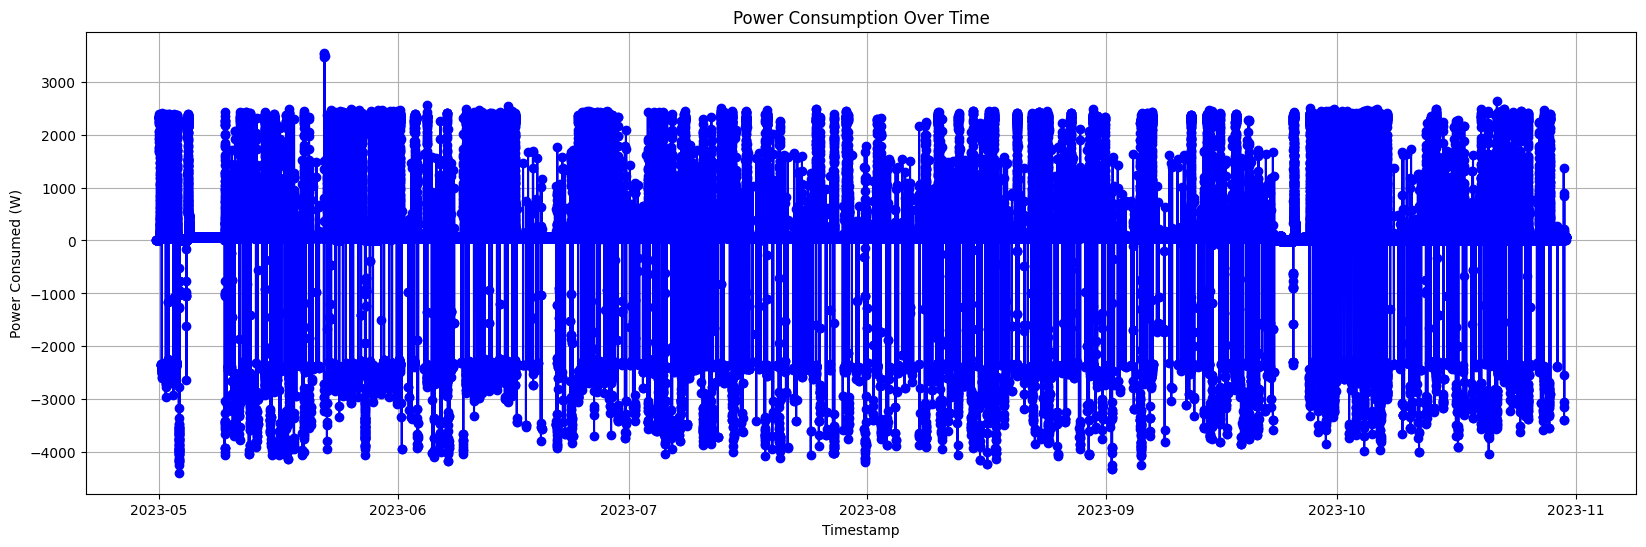

In [42]:
# Plot the relationship between timestamp and consumed diesel
%matplotlib inline
plt.figure(figsize=(20, 6))
plt.plot(data_df['Timestamp'], data_df['Power Consumed (W)'], marker='o', linestyle='-', color='b')
plt.title('Power Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Power Consumed (W)')
plt.grid(True)
plt.show()

In [43]:
data_df.shape

(272532, 9)

In [44]:
#slicing data with non-numerical columns (i.e column suitable for categorical) from the dataset
non_num_columns_data_df = data_df.loc[:, data_df.dtypes == 'object']

non_num_columns_data_df.shape

(272532, 1)

In [45]:
non_num_columns_data_df.head()

,AC Input
0,Grid
1,Grid
2,Grid
3,Grid
4,Grid


In [46]:
non_num_columns_data_df.nunique()

AC Input    3
dtype: int64

In [47]:
non_num_columns_data_df.shape # Shape of dataframe with non-numeric values in columns

(272532, 1)

In [48]:
num_columns_data_df.shape # Shape of dataframe with numeric values in columns

(273082, 7)

In [49]:
#now, lets combine the non_num_columns_data_df and the cleaned num_columns_data_df

#cleaned_data_df = pd.concat([num_columns_data_df, non_num_columns_data_df], axis=1)

file_name = 'PC_0_EAJ0001C_log_20230430-1605_to_20231030-1604_cleaned.csv'

data_df.to_csv(file_name, index=False)

data_df.shape

(272532, 9)

In [50]:
# Download the CSV file into system locally
try: # If using Ggoogle Colab
    from google.colab import files
    files.download('file_name')
    print('Download')
except Exception as s: # If using Jupyter Lab
    from IPython.display import FileLink
    display(FileLink(file_name))
    print('Downloaded as link above -------->')
except Exception as e:
    print(f'Error: {e}')

/home/studio-lab-user/sagemaker-studiolab-notebooks/PC_0_EAJ0001C_log_20230430-1605_to_20231030-1604_cleaned.csv

Downloaded as link above -------->


Text(0, 0.5, 'AC Consumption')

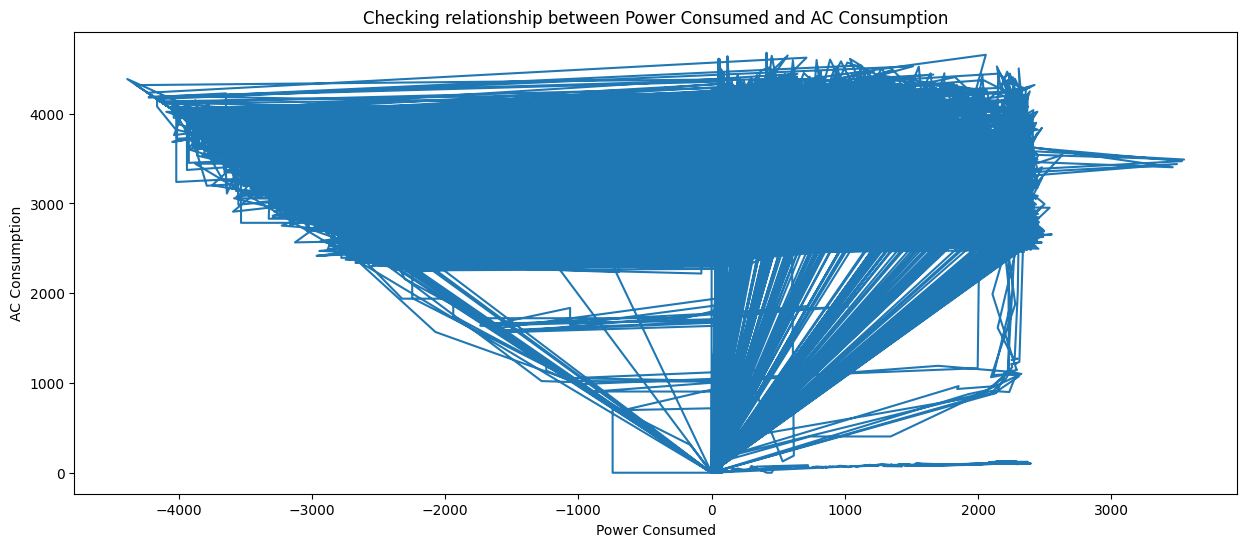

In [51]:
plt.figure(figsize=(15, 6))
plt.plot(data_df['Power Consumed (W)'], data_df['AC Consumption (W)'], label='Value')
plt.title('Checking relationship between Power Consumed and AC Consumption')
plt.xlabel('Power Consumed')
plt.ylabel('AC Consumption')

Text(0, 0.5, 'Output Power (W)')

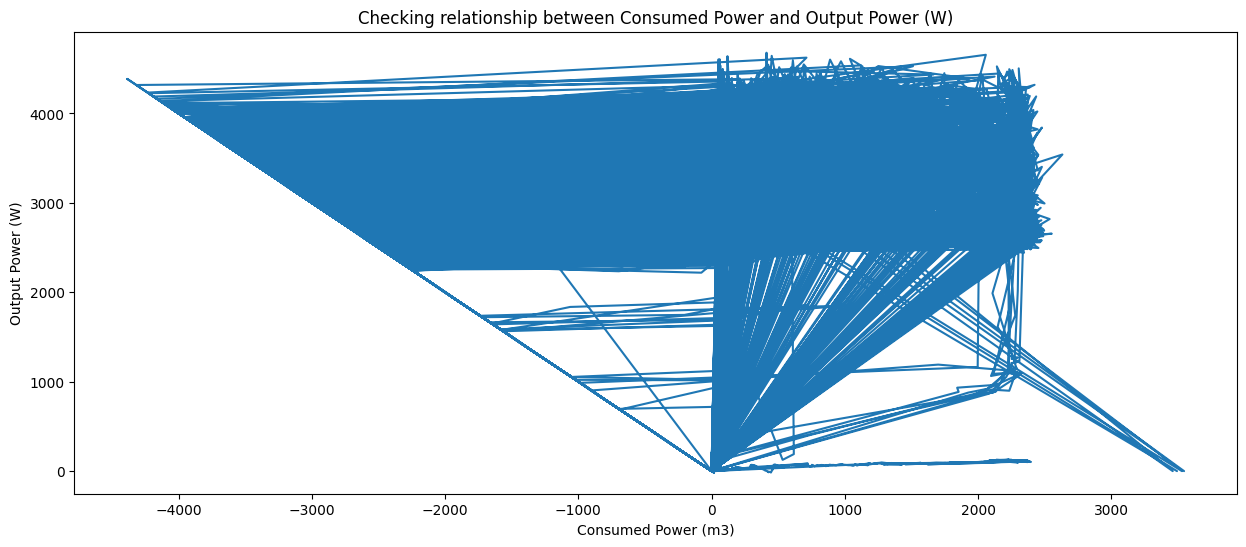

In [52]:
plt.figure(figsize=(15, 6))
plt.plot(data_df['Power Consumed (W)'], data_df['Output Power (W)'], label='Value')
plt.title('Checking relationship between Consumed Power and Output Power (W)')
plt.xlabel('Consumed Power (m3)')
plt.ylabel('Output Power (W)')

Text(0, 0.5, 'Input Power (W)')

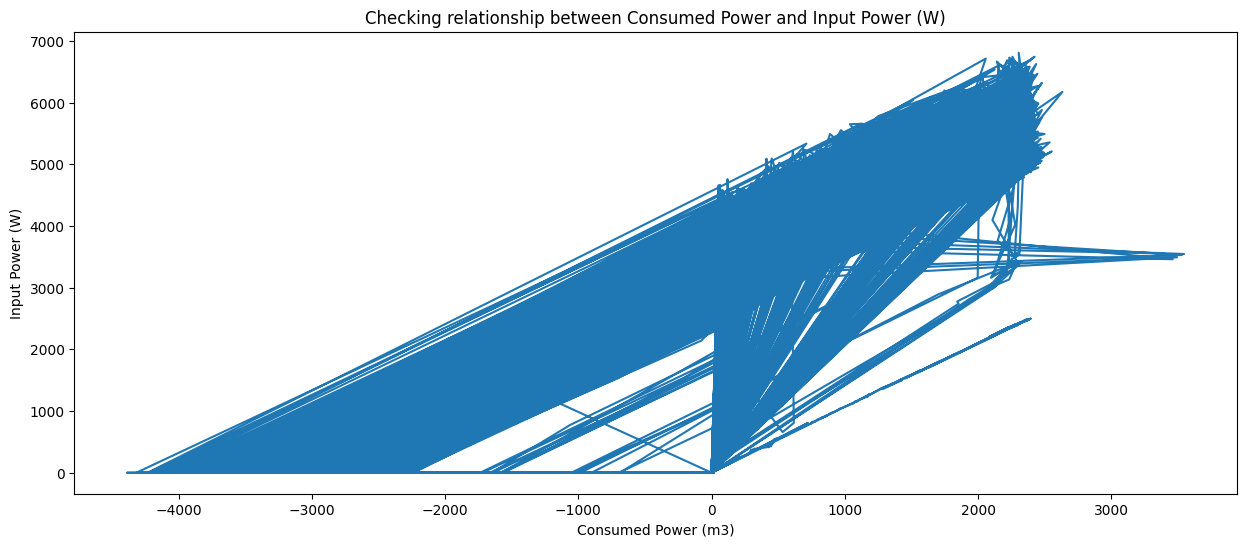

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(data_df['Power Consumed (W)'], data_df['Input Power (W)'], label='Value')
plt.title('Checking relationship between Consumed Power and Input Power (W)')
plt.xlabel('Consumed Power (m3)')
plt.ylabel('Input Power (W)')

# Feature Engineering

## Encoding manually or the Tank STatus Column.

In [54]:
column_quick_view(data_df,[7])

Unique values in column ==============0== "AC Input" is  ================= 4
They are ['Grid' 'Inverting' 'Generator' nan]
Unique value counts for column "AC Input" are
AC Input
Grid         188051
Generator     64603
Inverting     18310
Name: count, dtype: int64




In [55]:
# One Hot Encoding ----> I have a Noinal Data
pd.set_option('display.max_columns', None)

data_df_encode = pd.get_dummies(data_df, columns=['AC Input'], drop_first = True).set_index(data_df.index)

In [56]:
data_df_encode.shape

(272532, 10)

In [57]:
data_df_encode.head(80)

,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),Power Consumed (W),AC Input_Grid,AC Input_Inverting
0,2023-08-29 00:47:22,2479.0,2418.0,2479.0,0.0,5.480,2418.0,61.0,True,False
1,2023-08-29 00:48:21,2481.0,2421.0,2481.0,0.0,5.480,2421.0,60.0,True,False
2,2023-08-29 00:49:21,2478.0,2421.0,2478.0,0.0,5.478,2421.0,57.0,True,False
3,2023-08-29 00:50:21,2487.0,2426.0,2481.0,0.0,5.480,2420.0,61.0,True,False
4,2023-08-29 00:51:21,2474.0,2414.0,2474.0,0.0,5.478,2414.0,60.0,True,False
5,2023-08-29 00:52:21,2489.0,2429.0,2490.0,0.0,5.479,2427.0,60.0,True,False
6,2023-08-29 00:53:21,2463.0,2404.0,2463.0,0.0,5.479,2404.0,59.0,True,False
7,2023-08-29 00:54:21,2452.0,2390.0,2452.0,0.0,5.479,2390.0,62.0,True,False
8,2023-08-29 00:55:21,2546.0,2486.0,2546.0,0.0,5.478,2486.0,60.0,True,False
9,2023-08-29 00:56:21,2460.0,2401.0,2460.0,0.0,5.477,2401.0,59.0,True,False


In [58]:
# data_df['AC Input'] = pd.to_numeric(data_df['AC Input'], errors = 'coerce').fillna(0)

# data_df

In [59]:
# Plottign a heatmap to see correlation between columns with integer values

correlation_matrix = data_df_encode.corr()

# FIrstly, let me print out manuly correlation base on descanding values for my numerical columns
#correlation_result_DT = correlation_matrix["Timestamp"].sort_values(ascending = False)
#correlation_result_DT

In [60]:
correlation_result = correlation_matrix["Power Consumed (W)"].sort_values(ascending = False)
correlation_result

Power Consumed (W)        1.000000
Battery Powerset (W)      0.876533
Input Power (W)           0.658639
Generator Powerset (W)    0.387873
Grid Powerset (W)         0.112751
AC Input_Grid             0.051955
AC Consumption (W)        0.030544
Output Power (W)          0.030111
Timestamp                -0.005026
AC Input_Inverting       -0.570693
Name: Power Consumed (W), dtype: float64

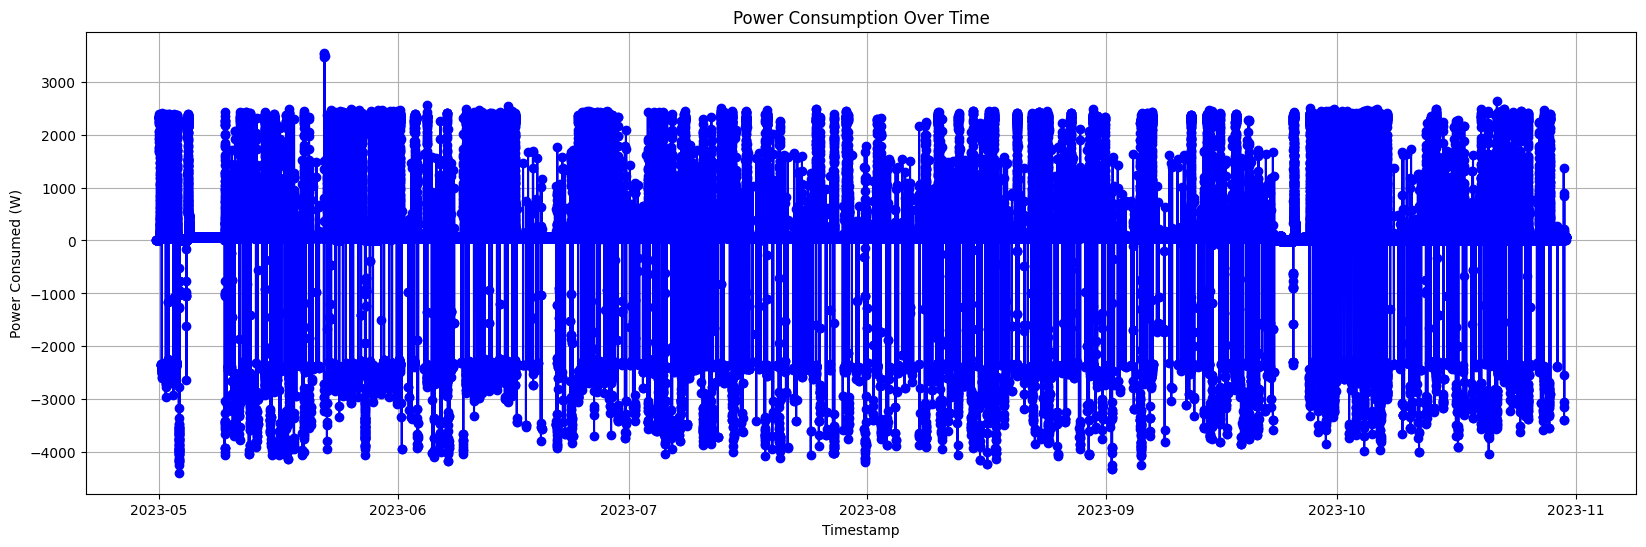

In [61]:
# Plot the relationship between timestamp and consumed diesel
%matplotlib inline
plt.figure(figsize=(20, 6))
plt.plot(data_df['Timestamp'], data_df['Power Consumed (W)'], marker='o', linestyle='-', color='b')
plt.title('Power Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Power Consumed (W)')
plt.grid(True)
plt.show()

In [62]:
data_quick_view(data_df_encode)

Unique values in column ==============0== "Timestamp" is  ================= 272532
Unique values in column ==============1== "Input Power (W)" is  ================= 4600
Unique values in column ==============2== "Output Power (W)" is  ================= 2984
Unique values in column ==============3== "Grid Powerset (W)" is  ================= 3524
Unique values in column ==============4== "Generator Powerset (W)" is  ================= 3926
Unique values in column ==============5== "Battery Powerset (W)" is  ================= 25233
Unique values in column ==============6== "AC Consumption (W)" is  ================= 2983
Unique values in column ==============7== "Power Consumed (W)" is  ================= 4333
Unique values in column ==============8== "AC Input_Grid" is  ================= 2
Unique values in column ==============9== "AC Input_Inverting" is  ================= 2


In [63]:
data_df_encode.isnull().sum()

Timestamp                 0
Input Power (W)           0
Output Power (W)          0
Grid Powerset (W)         0
Generator Powerset (W)    0
Battery Powerset (W)      0
AC Consumption (W)        0
Power Consumed (W)        0
AC Input_Grid             0
AC Input_Inverting        0
dtype: int64

In [64]:
data_df_encode.describe()

,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),Power Consumed (W)
count,272532,272532.000000,272532.000000,272532.000000,272532.000000,272532.000000,272532.000000,272532.000000
mean,2023-07-31 11:45:20.129947904,2722.233030,2676.989073,1987.086559,724.879702,-25.636981,2676.952475,45.243957
min,2023-04-30 16:05:04,0.000000,-18.000000,0.000000,0.000000,-4740.500000,0.000000,-4386.000000
25%,2023-06-15 18:41:47.249999872,2464.000000,2407.000000,0.000000,0.000000,5.475000,2407.000000,57.000000
50%,2023-07-31 13:13:09.500000,2591.000000,2538.000000,2483.000000,0.000000,5.478000,2538.000000,61.000000
75%,2023-09-15 12:41:11.249999872,3406.000000,3198.000000,2876.000000,0.000000,5.481000,3198.000000,65.000000
max,2023-10-30 16:04:55,6809.000000,4679.000000,6456.000000,6809.000000,2364.835938,4679.000000,3546.000000
std,NaN,1101.188517,828.975333,1420.124401,1449.091343,709.815744,828.916073,700.324431


In [65]:
file_name = 'PC_0_EAJ0001C_log_20230430-1605_to_20231030-1604_encoded.csv'

#cleaned_data_df is my cleaned DataFrame
data_df.to_csv(file_name, index=False)

data_df.shape
# Download the CSV file into system locally
try: # If using Ggoogle Colab
    from google.colab import files
    files.download('file_name')
    print('Download')
except Exception as s: # If using Jupyter Lab
    from IPython.display import FileLink
    display(FileLink(file_name))
    print('Downloaded as link above -------->')
except Exception as e:
    print(f'Error: {e}')

/home/studio-lab-user/sagemaker-studiolab-notebooks/PC_0_EAJ0001C_log_20230430-1605_to_20231030-1604_encoded.csv

Downloaded as link above -------->


# Lets build the model now

The Prophet Algorithm built by Meta for now
Prophet is designed for forecasting time series data that exhibits patterns on different time scales. It handles missing data and outliers well.

In [66]:
prophet_data = data_df_encode[['Timestamp', 'Power Consumed (W)']]
data_quick_view(prophet_data)

prophet_data.columns = ['ds', 'y'] # Rename the TImestamp to 'ds' and Downtime to 'y' as needed my the algorithm
print(prophet_data.shape)
prophet_data.head()

Unique values in column ==============0== "Timestamp" is  ================= 272532
Unique values in column ==============1== "Power Consumed (W)" is  ================= 4333
(272532, 2)


,ds,y
0,2023-08-29 00:47:22,61.0
1,2023-08-29 00:48:21,60.0
2,2023-08-29 00:49:21,57.0
3,2023-08-29 00:50:21,61.0
4,2023-08-29 00:51:21,60.0


In [67]:
# Spliting the dataset into training and testing sets
train_size = int(len(prophet_data) * 0.75) # Pick 75%
train_data, test_data = prophet_data[:train_size], prophet_data[train_size:]
train_data.shape

(204399, 2)

In [68]:
test_data.shape

(68133, 2)

In [69]:
# Initialize the Prophet model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(train_data)

22:35:26 - cmdstanpy - INFO - Chain [1] start processing
22:35:55 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
test_forecast = prophet_model.predict(test_data)

future_dates = prophet_model.make_future_dataframe(periods=365)  # Forecasting for the next year (365 days)
forecast_365 = prophet_model.predict(future_dates)

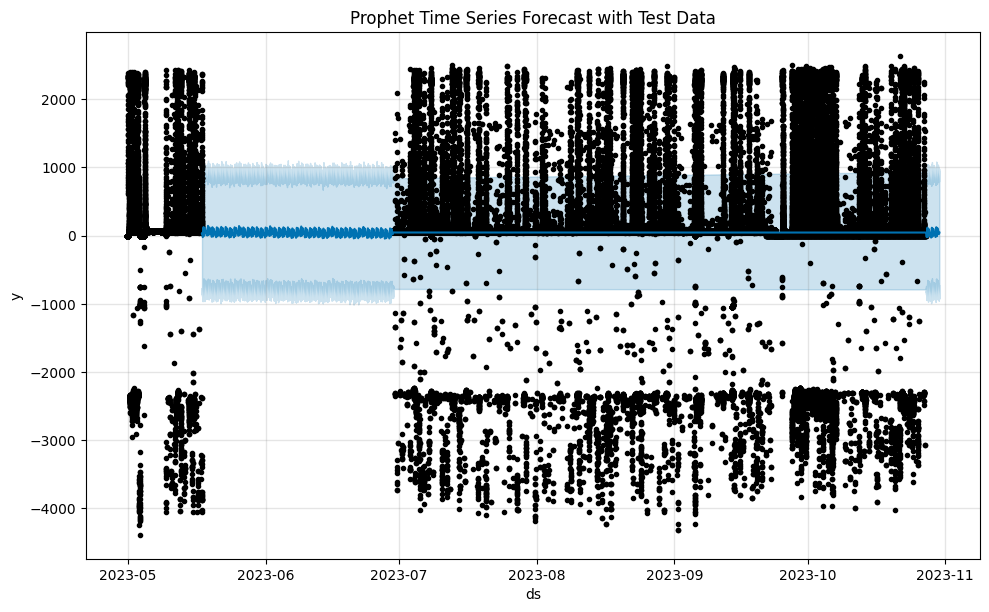

In [71]:
# Plotting the graph
fig = prophet_model.plot(test_forecast)
plt.title('Prophet Time Series Forecast with Test Data')
plt.show()

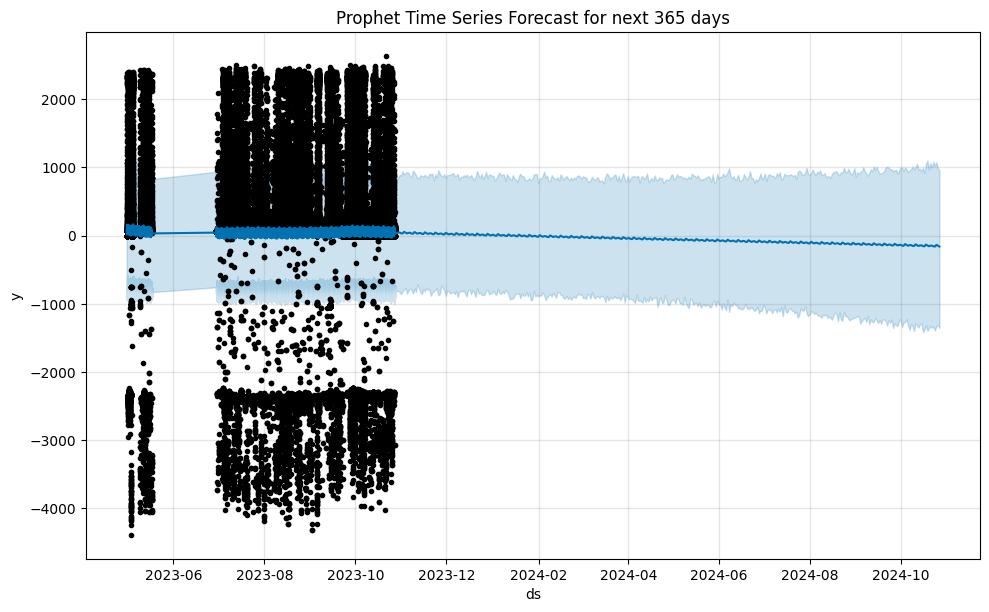

In [72]:
# Plotting the graph
fig = prophet_model.plot(forecast_365)
plt.title('Prophet Time Series Forecast for next 365 days')
plt.show()

In [73]:
y_test = test_data['y']
mae = mean_absolute_error(y_test, test_forecast['yhat'])
print(f'MAE = {mae}')

mse = mean_squared_error(y_test, test_forecast['yhat'])
print(f'MSE = {mse}')

MAE = 311.67237928169556
MSE = 619860.3072601705


# Lets build a model with the AutoRegressive Integrated Moving Average (ARIMA)
some EDA that will be needed may include
- Stationarity Check using Augumented Dickey-FUller Test
- Plotting the AutoCorrelation Function (ACF) to identify the order of the ARIMA Model
- Plotting the Partial AutoCorrelation Function (PACF) to identify the order of the ARIMA Model
- Outlier Detection Techniques to handle outliers in the model
- Smoothing ETC

In [74]:
X = data_df_encode.drop('Power Consumed (W)', axis=1)  # Features
y = data_df_encode[['Power Consumed (W)']]  # Target

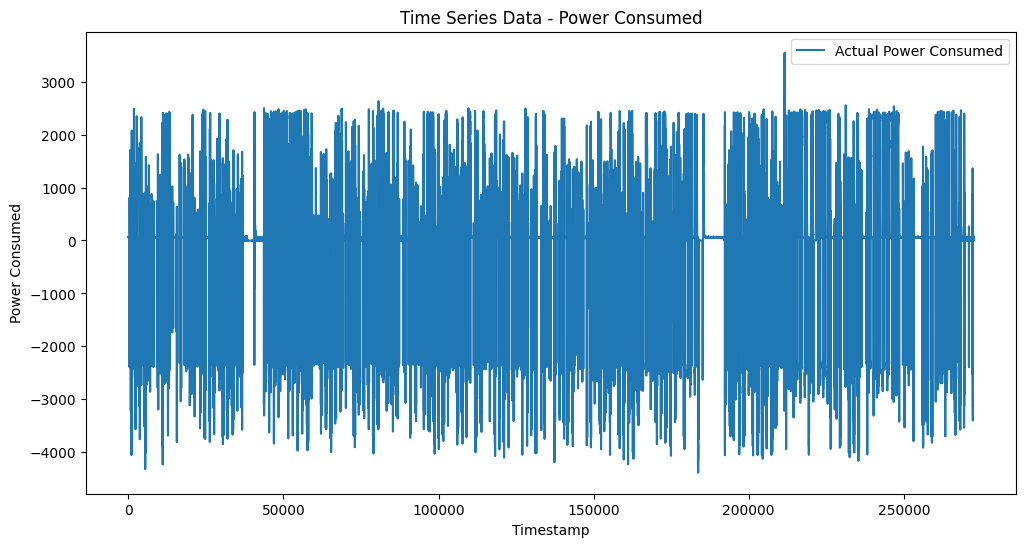

In [75]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(y, label='Actual Power Consumed')
plt.title('Time Series Data - Power Consumed')
plt.xlabel('Timestamp')
plt.ylabel('Power Consumed')
plt.legend()
plt.show()

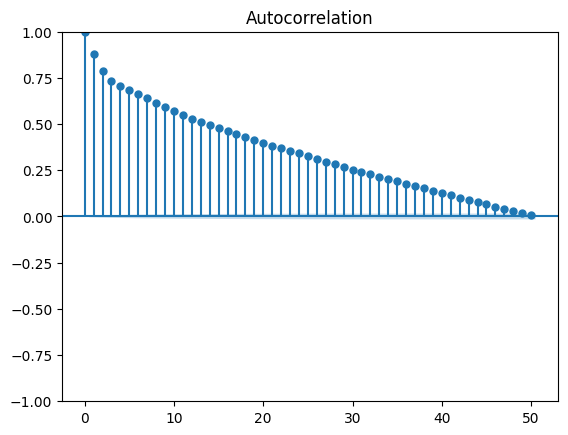

<Figure size 1200x600 with 0 Axes>

In [76]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF

plot_acf(y, lags=50) #autocorrelation function (ACF)
plt.figure(figsize=(12, 6))
plt.show()

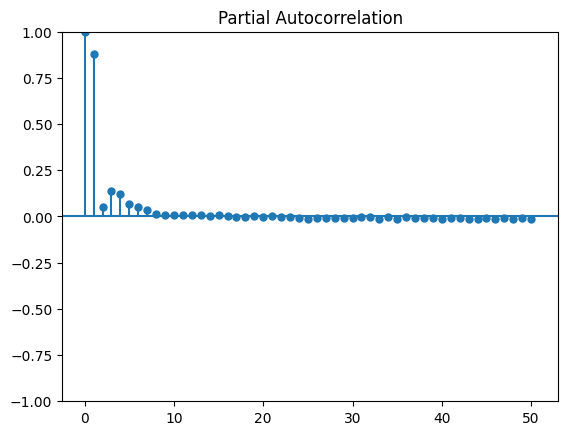

<Figure size 1200x600 with 0 Axes>

In [77]:
# Plot PACF
plot_pacf(y, lags=50) # partial autocorrelation function (PACF)
plt.figure(figsize=(12, 6))
plt.show()

In [78]:
# Split the dataset into training and testing sets
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

In [79]:
# Train the ARIMA model
order = (3, 10, 1)   #The (p, d, q) order in an ARIMA model representing three components
model = ARIMA(train, order=order)

In [80]:
fit_model = model.fit()

In [81]:
# Forecast on the test set
forecast = fit_model.get_forecast(steps=len(test))

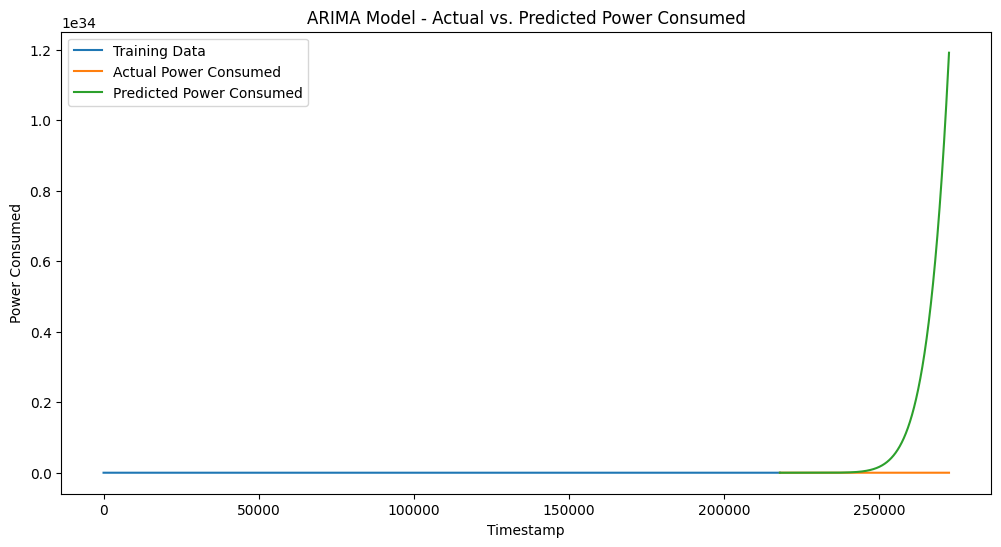

In [82]:
# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Power Consumed')
plt.plot(forecast.predicted_mean, label='Predicted Power Consumed')
plt.title('ARIMA Model - Actual vs. Predicted Power Consumed')
plt.xlabel('Timestamp')
plt.ylabel('Power Consumed')
plt.legend()
plt.show()

# Lets build another model with XGBoost Algorithm.
## The Extreme Gradient Boost (XGBoost) will help use better take care of Overfitting and Underfitting

In [83]:

# Lets encode the timestamp
from sklearn.preprocessing import LabelEncoder

# Assuming 'timestamp_column' is your timestamp column
timestamp_columns = ['year', 'month', 'day', 'hour', 'minute']

label_encoders = {}

for col in timestamp_columns:
    label_encoders[col] = LabelEncoder()
    data_df[col + '_encoded'] = label_encoders[col].fit_transform(data_df_encode['Timestamp'].dt.__getattribute__(col))

# Drop the original timestamp column
XGB_data_df = data_df_encode.drop('Timestamp', axis=1)
XGB_data_df.head()

,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),Power Consumed (W),AC Input_Grid,AC Input_Inverting
0,2479.0,2418.0,2479.0,0.0,5.480,2418.0,61.0,True,False
1,2481.0,2421.0,2481.0,0.0,5.480,2421.0,60.0,True,False
2,2478.0,2421.0,2478.0,0.0,5.478,2421.0,57.0,True,False
3,2487.0,2426.0,2481.0,0.0,5.480,2420.0,61.0,True,False
4,2474.0,2414.0,2474.0,0.0,5.478,2414.0,60.0,True,False


In [84]:
#Define features (X) and target (y)
X = XGB_data_df.drop('Power Consumed (W)', axis=1)  # Features
y = XGB_data_df[['Power Consumed (W)']]  # Target

print(X.head())

print(y.head())

print(y.isnull().sum())

   Input Power (W)  Output Power (W)  Grid Powerset (W)  \
0           2479.0            2418.0             2479.0   
1           2481.0            2421.0             2481.0   
2           2478.0            2421.0             2478.0   
3           2487.0            2426.0             2481.0   
4           2474.0            2414.0             2474.0   

   Generator Powerset (W)  Battery Powerset (W)  AC Consumption (W)  \
0                     0.0                 5.480              2418.0   
1                     0.0                 5.480              2421.0   
2                     0.0                 5.478              2421.0   
3                     0.0                 5.480              2420.0   
4                     0.0                 5.478              2414.0   

   AC Input_Grid  AC Input_Inverting  
0           True               False  
1           True               False  
2           True               False  
3           True               False  
4           True       

In [85]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost model
model = XGBRegressor(eval_metric='logloss')

In [86]:
# Train the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='logloss',
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [87]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [88]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE = {mae:.2f}')

MAE = 5.54


In [89]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE = {mse:.2f}')


MSE = 268.39


In [90]:
rsme = sqrt(mse)
print(f'RMSE = {rsme:.2f}')

RMSE = 16.38


## From the above 3 models, the Prophet Model and the XGBoost model seems to be the better models and is recommended for production use.

# Testing Our Model With The New Data

In [91]:
# Function to download file from Google Drive
def download_from_drive(test_drive_link):
    # Construct the download link
    download_link = f"https://drive.google.com/uc?id={test_drive_link}"

    # Use wget to download the file and return content
    return os.popen(f"wget --quiet --no-check-certificate -O - '{download_link}'").read()

# Specifying the hackathon dataset link
t_dataset_links = [
    '12cVx7OV-jqvcYWlPMMZZoj5ND6erq2El' # Load the test dataset
]

# Download and read datasets
test_df = pd.read_csv(StringIO(download_from_drive(t_dataset_links[0])), header=None, skiprows=[0, 1, 2])

In [92]:
print(f'For data with adjusted heading, shape is {test_df.shape}, total no of null is {test_df.isnull().sum().sum()}')

For data with adjusted heading, shape is (4455, 95), total no of null is 53972


In [93]:
test_head_df = pd.read_csv(StringIO(download_from_drive(t_dataset_links[0])), header = None, skiprows=lambda x: x not in rows_to_load)

In [94]:
test_head_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,timestamp,Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],Gateway [0],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],VE.Bus System [261],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Battery Monitor [260],Tank [20],Tank [20],Tank [20],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [0],System overview [261]
1,Africa/Lagos (+01:00),VRM Log time offset,ESS Scheduled Charging,Relay 1 state,CCGX Relay 2 state,Actual working state of Dynamic ESS,Dynamic ESS error code,Phase rotation,Input voltage phase 1,Input current phase 1,Input frequency 1,Input power 1,Output voltage phase 1,Output current phase 1,Output frequency,Output power 1,Voltage,Current,Active input,Active input current limit,AC Input 1 Current Limit,AC Input 2 Current Limit,VE.Bus state,VE.Bus Error,Switch Position,Temperature,Low battery,Overload,Temperatur sensor alarm,Voltage sensor alarm,High DC Ripple,Temperature L1,Low battery L1,Overload L1,High DC Ripple L1,Temperature L2,Low battery L2,Overload L2,High DC Ripple L2,Temperature L3,Low battery L3,Overload L3,High DC Ripple L3,Charge state,Ignore AC input,Ignore AC input 2,Voltage,Starter battery voltage,Current,Consumed Amphours,State of charge,Time to go,Low voltage alarm,High voltage alarm,Low starter-voltage alarm,High starter-voltage alarm,Low state-of-charge alarm,Low battery temperature alarm,High battery temperature alarm,Mid-voltage alarm,Relay status,Last discharge,Total Ah drawn,Time since last full charge,Automatic syncs,Low voltage alarms,Discharged Energy,Charged Energy,Tank level,Tank remaining fluid,Tank status,#1 Low SOC; discharge disabled,#2 BatteryLife is active,#3 Charge disabled by BMS,#4 Discharge disabled by BMS,#5 Slow charge is active,#6 Charge disabled by user setting,#7 Discharge disabled by user setting,AC Consumption L1,Grid L1,Genset L1,Voltage,Current,VE.Bus charge current,Battery Power,VE.Bus charge power,Battery SOC,Battery state,Battery Consumed Amphours,Battery Time to Go,DVCC Multiple batteries alarm,GX Error #48 DVCC with incompatible firmware,AC-Input,Consumption Forecast,Grid alarm
2,NaN,s,NaN,NaN,NaN,NaN,NaN,NaN,V,A,Hz,W,V,A,Hz,W,V,A,NaN,A,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [95]:
header_writer(test_df, test_head_df)
test_df.columns = test_df.columns.set_names(None)
test_df.head()

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,Gateway [0]. Actual working state of Dynamic ESS.,Gateway [0]. Dynamic ESS error code.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input.,VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [0]. Consumption Forecast. (Wh),System overview [261]. Grid alarm.
0,2023-10-27 16:05:51,1.0

In [96]:
test_df.dtypes

timestamp. Africa/Lagos (+01:00).                                        object
Gateway [0]. VRM Log time offset. (s)                                   float64
Gateway [0]. ESS Scheduled Charging.                                     object
Gateway [0]. Relay 1 state.                                              object
Gateway [0]. CCGX Relay 2 state.                                         object
Gateway [0]. Actual working state of Dynamic ESS.                        object
Gateway [0]. Dynamic ESS error code.                                     object
VE.Bus System [261]. Phase rotation.                                     object
VE.Bus System [261]. Input voltage phase 1. (V)                         float64
VE.Bus System [261]. Input current phase 1. (A)                         float64
VE.Bus System [261]. Input frequency 1. (Hz)                            float64
VE.Bus System [261]. Input power 1. (W)                                 float64
VE.Bus System [261]. Output voltage phas

In [97]:
drop_common_columns(test_df,common_columns_list)

test_df.shape

(4455, 92)

In [98]:
pd.set_option('display.max_columns', None)

test_df.head()

,timestamp. Africa/Lagos (+01:00).,Gateway [0]. VRM Log time offset. (s),Gateway [0]. ESS Scheduled Charging.,Gateway [0]. Relay 1 state.,Gateway [0]. CCGX Relay 2 state.,VE.Bus System [261]. Phase rotation.,VE.Bus System [261]. Input voltage phase 1. (V),VE.Bus System [261]. Input current phase 1. (A),VE.Bus System [261]. Input frequency 1. (Hz),VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output voltage phase 1. (V),VE.Bus System [261]. Output current phase 1. (A),VE.Bus System [261]. Output frequency. (Hz),VE.Bus System [261]. Output power 1. (W),VE.Bus System [261]. Voltage. (V),VE.Bus System [261]. Current. (A),VE.Bus System [261]. Active input.,VE.Bus System [261]. Active input current limit. (A),VE.Bus System [261]. AC Input 1 Current Limit. (A),VE.Bus System [261]. AC Input 2 Current Limit. (A),VE.Bus System [261]. VE.Bus state.,VE.Bus System [261]. VE.Bus Error.,VE.Bus System [261]. Switch Position.,VE.Bus System [261]. Temperature.,VE.Bus System [261]. Low battery.,VE.Bus System [261]. Overload.,VE.Bus System [261]. Temperatur sensor alarm.,VE.Bus System [261]. Voltage sensor alarm.,VE.Bus System [261]. High DC Ripple.,VE.Bus System [261]. Temperature L1.,VE.Bus System [261]. Low battery L1.,VE.Bus System [261]. Overload L1.,VE.Bus System [261]. High DC Ripple L1.,VE.Bus System [261]. Temperature L2.,VE.Bus System [261]. Low battery L2.,VE.Bus System [261]. Overload L2.,VE.Bus System [261]. High DC Ripple L2.,VE.Bus System [261]. Temperature L3.,VE.Bus System [261]. Low battery L3.,VE.Bus System [261]. Overload L3.,VE.Bus System [261]. High DC Ripple L3.,VE.Bus System [261]. Charge state.,VE.Bus System [261]. Ignore AC input.,VE.Bus System [261]. Ignore AC input 2.,Battery Monitor [260]. Voltage. (V),Battery Monitor [260]. Starter battery voltage. (V),Battery Monitor [260]. Current. (A),Battery Monitor [260]. Consumed Amphours. (Ah),Battery Monitor [260]. State of charge. (%),Battery Monitor [260]. Time to go. (h),Battery Monitor [260]. Low voltage alarm.,Battery Monitor [260]. High voltage alarm.,Battery Monitor [260]. Low starter-voltage alarm.,Battery Monitor [260]. High starter-voltage alarm.,Battery Monitor [260]. Low state-of-charge alarm.,Battery Monitor [260]. Low battery temperature alarm.,Battery Monitor [260]. High battery temperature alarm.,Battery Monitor [260]. Mid-voltage alarm.,Battery Monitor [260]. Relay status.,Battery Monitor [260]. Last discharge. (Ah),Battery Monitor [260]. Total Ah drawn. (Ah),Battery Monitor [260]. Time since last full charge.,Battery Monitor [260]. Automatic syncs.,Battery Monitor [260]. Low voltage alarms.,Battery Monitor [260]. Discharged Energy. (kWh),Battery Monitor [260]. Charged Energy. (kWh),Tank [20]. Tank level. (M3),Tank [20]. Tank remaining fluid. (M3),Tank [20]. Tank status.,System overview [0]. #1 Low SOC; discharge disabled.,System overview [0]. #2 BatteryLife is active.,System overview [0]. #3 Charge disabled by BMS.,System overview [0]. #4 Discharge disabled by BMS.,System overview [0]. #5 Slow charge is active.,System overview [0]. #6 Charge disabled by user setting.,System overview [0]. #7 Discharge disabled by user setting.,System overview [0]. AC Consumption L1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Voltage. (V),System overview [0]. Current. (A),System overview [0]. VE.Bus charge current. (A),System overview [0]. Battery Power. (W),System overview [0]. VE.Bus charge power. (W),System overview [0]. Battery SOC. (%),System overview [0]. Battery state.,System overview [0]. Battery Consumed Amphours. (Ah),System overview [0]. Battery Time to Go. (h),System overview [0]. DVCC Multiple batteries alarm.,System overview [0]. GX Error #48 DVCC with incompatible firmware.,System overview [0]. AC-Input.,System overview [261]. Grid alarm.
0,2023-10-27 16:05:51,1.0,Not active,Open,Open,Ok,222.7,16.9,50.36,3162.0,222.7,15.9,50.2,3096.0,54.48,0.8,AC Input 2,32.0,32.0,32.0,Float,No error,On,Ok,Ok,Ok,

In [99]:
pd.set_option('display.max_columns', None)

print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 92 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   timestamp. Africa/Lagos (+01:00).                                     4455 non-null   object 
 1   Gateway [0]. VRM Log time offset. (s)                                 4383 non-null   float64
 2   Gateway [0]. ESS Scheduled Charging.                                  4383 non-null   object 
 3   Gateway [0]. Relay 1 state.                                           4383 non-null   object 
 4   Gateway [0]. CCGX Relay 2 state.                                      4383 non-null   object 
 5   VE.Bus System [261]. Phase rotation.                                  4383 non-null   object 
 6   VE.Bus System [261]. Input voltage phase 1. (V)                       4383 non-null   float64
 7

In [100]:
null_counter(test_df)

Columns with Null Values:
timestamp. Africa/Lagos (+01:00).                                          0
Gateway [0]. VRM Log time offset. (s)                                     72
Gateway [0]. ESS Scheduled Charging.                                      72
Gateway [0]. Relay 1 state.                                               72
Gateway [0]. CCGX Relay 2 state.                                          72
VE.Bus System [261]. Phase rotation.                                      72
VE.Bus System [261]. Input voltage phase 1. (V)                           72
VE.Bus System [261]. Input current phase 1. (A)                           72
VE.Bus System [261]. Input frequency 1. (Hz)                              72
VE.Bus System [261]. Input power 1. (W)                                   72
VE.Bus System [261]. Output voltage phase 1. (V)                          72
VE.Bus System [261]. Output current phase 1. (A)                          72
VE.Bus System [261]. Output frequency. (Hz)       

In [101]:
test_df.nunique()

timestamp. Africa/Lagos (+01:00).                                       4455
Gateway [0]. VRM Log time offset. (s)                                     15
Gateway [0]. ESS Scheduled Charging.                                       1
Gateway [0]. Relay 1 state.                                                2
Gateway [0]. CCGX Relay 2 state.                                           1
VE.Bus System [261]. Phase rotation.                                       1
VE.Bus System [261]. Input voltage phase 1. (V)                           35
VE.Bus System [261]. Input current phase 1. (A)                           35
VE.Bus System [261]. Input frequency 1. (Hz)                              18
VE.Bus System [261]. Input power 1. (W)                                 1176
VE.Bus System [261]. Output voltage phase 1. (V)                          53
VE.Bus System [261]. Output current phase 1. (A)                          68
VE.Bus System [261]. Output frequency. (Hz)                               35

In [102]:
test_df.select_dtypes(include = 'object').nunique()

timestamp. Africa/Lagos (+01:00).                                       4455
Gateway [0]. ESS Scheduled Charging.                                       1
Gateway [0]. Relay 1 state.                                                2
Gateway [0]. CCGX Relay 2 state.                                           1
VE.Bus System [261]. Phase rotation.                                       1
VE.Bus System [261]. Active input.                                         3
VE.Bus System [261]. VE.Bus state.                                         4
VE.Bus System [261]. VE.Bus Error.                                         1
VE.Bus System [261]. Switch Position.                                      1
VE.Bus System [261]. Temperature.                                          1
VE.Bus System [261]. Low battery.                                          2
VE.Bus System [261]. Overload.                                             1
VE.Bus System [261]. Temperatur sensor alarm.                              1

In [103]:
data_quick_view(test_df)

Unique values in column ==============0== "timestamp. Africa/Lagos (+01:00).  " is  ================= 4455
Unique values in column ==============1== "Gateway [0]. VRM Log time offset. (s)" is  ================= 16
Unique values in column ==============2== "Gateway [0]. ESS Scheduled Charging.  " is  ================= 2
Unique values in column ==============3== "Gateway [0]. Relay 1 state.  " is  ================= 3
Unique values in column ==============4== "Gateway [0]. CCGX Relay 2 state.  " is  ================= 2
Unique values in column ==============5== "VE.Bus System [261]. Phase rotation.  " is  ================= 2
Unique values in column ==============6== "VE.Bus System [261]. Input voltage phase 1. (V)" is  ================= 36
Unique values in column ==============7== "VE.Bus System [261]. Input current phase 1. (A)" is  ================= 36
Unique values in column ==============8== "VE.Bus System [261]. Input frequency 1. (Hz)" is  ================= 19
Unique values in column

In [104]:
column_quick_view(test_df,[90])

Unique values in column ==============0== "System overview [0]. AC-Input.  " is  ================= 4
They are ['Grid' 'Inverting' nan 'Generator']
Unique value counts for column "System overview [0]. AC-Input.  " are
System overview [0]. AC-Input.  
Grid         3960
Generator     323
Inverting     100
Name: count, dtype: int64




In [105]:
# Now i am picking columns related to another dataframe,
# Using drop method is stressful and not giving me what i wanted after several trials.

selected_column_indices = [0, 9, 13, 77, 78, 82, 76, 90] # Picking Genset because its the Gen that uses the diesel
test_df = test_df.iloc[:, selected_column_indices]

data_quick_view(test_df)

test_df.shape

Unique values in column ==============0== "timestamp. Africa/Lagos (+01:00).  " is  ================= 4455
Unique values in column ==============1== "VE.Bus System [261]. Input power 1. (W)" is  ================= 1177
Unique values in column ==============2== "VE.Bus System [261]. Output power 1. (W)" is  ================= 1103
Unique values in column ==============3== "System overview [0]. Grid L1. (W)" is  ================= 991
Unique values in column ==============4== "System overview [0]. Genset L1. (W)" is  ================= 297
Unique values in column ==============5== "System overview [0]. Battery Power. (W)" is  ================= 435
Unique values in column ==============6== "System overview [0]. AC Consumption L1. (W)" is  ================= 1094
Unique values in column ==============7== "System overview [0]. AC-Input.  " is  ================= 4


(4455, 8)

In [106]:
test_df.head()

,timestamp. Africa/Lagos (+01:00).,VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output power 1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Battery Power. (W),System overview [0]. AC Consumption L1. (W),System overview [0]. AC-Input.
0,2023-10-27 16:05:51,3162.0,3096.0,3162.0,NaN,5.479,3096.0,Grid
1,2023-10-27 16:06:51,3201.0,3131.0,3201.0,NaN,5.480,3131.0,Grid
2,2023-10-27 16:07:51,3675.0,3609.0,3675.0,NaN,5.481,3609.0,Grid
3,2023-10-27 16:08:51,3220.0,3153.0,3192.0,NaN,5.479,3126.0,Grid
4,2023-10-27 16:09:51,3409.0,3342.0,3409.0,NaN,5.479,3342.0,Grid


In [107]:
test_df.describe()

,VE.Bus System [261]. Input power 1. (W),VE.Bus System [261]. Output power 1. (W),System overview [0]. Grid L1. (W),System overview [0]. Genset L1. (W),System overview [0]. Battery Power. (W),System overview [0]. AC Consumption L1. (W)
count,4383.000000,4383.000000,3964.000000,325.000000,4383.000000,4383.000000
mean,2699.964180,2635.969427,2675.815086,3697.713846,-5.429453,2634.998631
std,676.485609,367.458202,431.921167,981.303804,549.189988,366.919196
min,0.000000,2300.000000,0.000000,0.000000,-3766.283936,2300.000000
25%,2455.000000,2395.000000,2455.000000,3084.000000,5.479000,2395.000000
50%,2498.000000,2441.000000,2490.000000,3502.000000,5.480000,2440.000000
75%,2888.000000,2782.500000,2713.000000,4090.000000,5.482000,2779.500000
max,6060.000000,4124.000000,5153.000000,6060.000000,2216.412109,4115.000000


In [108]:
column_names = test_df.columns.tolist()
timestamp_new_name = 'Timestamp'
new_name1 = 'Input Power (W)'
new_name2 = 'Output Power (W)'
new_name3 = 'Grid Powerset (W)'
new_name4= 'Generator Powerset (W)'
new_name5= 'Battery Powerset (W)'
new_name6= 'AC Consumption (W)'
new_name7= 'AC Input'
column_names[0], column_names[1], column_names[2], column_names[3], column_names[4], column_names[5], column_names[6], column_names[7] = timestamp_new_name,new_name1,new_name2,new_name3, new_name4, new_name5, new_name6, new_name7

test_df.columns = column_names

test_df.head(2)

,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),AC Input
0,2023-10-27 16:05:51,3162.0,3096.0,3162.0,NaN,5.479,3096.0,Grid
1,2023-10-27 16:06:51,3201.0,3131.0,3201.0,NaN,5.480,3131.0,Grid


In [109]:
#converting our timestamp.  Africa/Lagos (+01:00) column to the right datetime dtype
# Will be helpful for time series modelling
test_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'])#, format='mixed') # The format mixed tells that my datasets doesn't have one specific format for all timestamp row in the dataset

test_df.head(2)

,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),AC Input
0,2023-08-29 00:47:22,3162.0,3096.0,3162.0,NaN,5.479,3096.0,Grid
1,2023-08-29 00:48:21,3201.0,3131.0,3201.0,NaN,5.480,3131.0,Grid


In [110]:
#slicing data with numerical columns (i.e int32 and float64) from the dataset
num_columns_test_df = test_df.loc[:, test_df.dtypes != 'object']

#num_columns_data_df = data_df.select_dtypes(include = [np.number]) # Should have used this to select my features but cus of TimeStamp column
num_columns_test_df.shape

(4455, 7)

In [111]:
num_columns_test_df.head(3)

,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W)
0,2023-08-29 00:47:22,3162.0,3096.0,3162.0,NaN,5.479,3096.0
1,2023-08-29 00:48:21,3201.0,3131.0,3201.0,NaN,5.480,3131.0
2,2023-08-29 00:49:21,3675.0,3609.0,3675.0,NaN,5.481,3609.0


In [112]:
num_columns_test_df.isnull().sum().sum() #This tells the total number of NaN in the columns with numerical values from the datasets

4909

In [113]:
test_df.isnull().sum().sum() #This tells the total number of NaN in every columns of the datasets

4981

In [114]:
num_columns_test_df = num_columns_test_df.fillna(0) # FIlling NaN in the setions dataset


# Select only numeric columns whose values is float or integer
#numeric_columns = data_df.select_dtypes(include= ['float64', 'int32', 'datetime64[ns]']).columns

numeric_columns = num_columns_test_df.columns
print(test_df[numeric_columns].isnull().sum().sum())
# Fill NaN values with 0 for numeric columns
test_df[numeric_columns] = test_df[numeric_columns].fillna(0) #  FIlling NaN with Zero in the main dataset

print(test_df[numeric_columns].isnull().sum().sum())
test_df.head()

4909
0


,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),AC Input
0,2023-08-29 00:47:22,3162.0,3096.0,3162.0,0.0,5.479,3096.0,Grid
1,2023-08-29 00:48:21,3201.0,3131.0,3201.0,0.0,5.480,3131.0,Grid
2,2023-08-29 00:49:21,3675.0,3609.0,3675.0,0.0,5.481,3609.0,Grid
3,2023-08-29 00:50:21,3220.0,3153.0,3192.0,0.0,5.479,3126.0,Grid
4,2023-08-29 00:51:21,3409.0,3342.0,3409.0,0.0,5.479,3342.0,Grid


In [115]:
test_df.isnull().sum().sum() # Nan column now reduced

72

In [116]:
test_df = test_df.iloc[550:]

test_df = test_df.reset_index(drop=True)

In [117]:
# Lets calculate for Power consumed coulms\
test_df['Power Consumed (W)'] = (test_df['Input Power (W)'] - test_df['Output Power (W)'])

In [118]:
test_df.head(20)

,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),AC Input,Power Consumed (W)
0,2023-08-29 09:53:22,2555.0,2489.0,2555.0,0.0,11.364,2489.0,Grid,66.0
1,2023-08-29 09:54:22,2497.0,2436.0,2497.0,0.0,11.364,2436.0,Grid,61.0
2,2023-08-29 09:55:22,2707.0,2647.0,2707.0,0.0,11.360,2647.0,Grid,60.0
3,2023-08-29 09:56:22,2517.0,2455.0,2517.0,0.0,11.364,2455.0,Grid,62.0
4,2023-08-29 09:57:22,2521.0,2460.0,2521.0,0.0,11.368,2460.0,Grid,61.0
5,2023-08-29 09:58:22,2511.0,2449.0,2511.0,0.0,11.366,2449.0,Grid,62.0
6,2023-08-29 09:59:22,2527.0,2462.0,2527.0,0.0,11.364,2462.0,Grid,65.0
7,2023-08-29 10:00:23,2742.0,2679.0,2548.0,0.0,11.364,2485.0,Grid,63.0
8,2023-08-29 10:01:22,2483.0,2420.0,2483.0,0.0,11.368,2420.0,Grid,63.0
9,2023-08-29 10:02:22,2485.0,2420.0,2485.0,0.0,11.366,2420.0,Grid,65.0


In [119]:
column_quick_view(test_df,[7])

Unique values in column ==============0== "AC Input" is  ================= 4
They are ['Grid' nan 'Inverting' 'Generator']
Unique value counts for column "AC Input" are
AC Input
Grid         3613
Generator     187
Inverting      41
Name: count, dtype: int64




## Encoding manually use One Hot Encoding

In [120]:
# One Hot Encoding ----> I have a Nominal Data
pd.set_option('display.max_columns', None)

test_df_encode = pd.get_dummies(test_df, columns=['AC Input'], drop_first = True).set_index(test_df.index)

In [121]:
test_df_encode.shape

(3905, 10)

In [122]:
test_df_encode.head(80)

,Timestamp,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),Power Consumed (W),AC Input_Grid,AC Input_Inverting
0,2023-08-29 09:53:22,2555.0,2489.0,2555.0,0.0,11.364,2489.0,66.0,True,False
1,2023-08-29 09:54:22,2497.0,2436.0,2497.0,0.0,11.364,2436.0,61.0,True,False
2,2023-08-29 09:55:22,2707.0,2647.0,2707.0,0.0,11.360,2647.0,60.0,True,False
3,2023-08-29 09:56:22,2517.0,2455.0,2517.0,0.0,11.364,2455.0,62.0,True,False
4,2023-08-29 09:57:22,2521.0,2460.0,2521.0,0.0,11.368,2460.0,61.0,True,False
5,2023-08-29 09:58:22,2511.0,2449.0,2511.0,0.0,11.366,2449.0,62.0,True,False
6,2023-08-29 09:59:22,2527.0,2462.0,2527.0,0.0,11.364,2462.0,65.0,True,False
7,2023-08-29 10:00:23,2742.0,2679.0,2548.0,0.0,11.364,2485.0,63.0,True,False
8,2023-08-29 10:01:22,2483.0,2420.0,2483.0,0.0,11.368,2420.0,63.0,True,False
9,2023-08-29 10:02:22,2485.0,2420.0,2485.0,0.0,11.366,2420.0,65.0,True,False


In [123]:
test_df_encode.isnull().sum()

Timestamp                 0
Input Power (W)           0
Output Power (W)          0
Grid Powerset (W)         0
Generator Powerset (W)    0
Battery Powerset (W)      0
AC Consumption (W)        0
Power Consumed (W)        0
AC Input_Grid             0
AC Input_Inverting        0
dtype: int64

# Using the Prophet Model

In [124]:
prophet_test_data = test_df_encode[['Timestamp', 'Power Consumed (W)']]
data_quick_view(prophet_test_data)

prophet_test_data.columns = ['ds', 'y'] # Rename the TImestamp to 'ds' and Downtime to 'y' as needed my the algorithm
print(prophet_test_data.shape)
prophet_test_data.head()

Unique values in column ==============0== "Timestamp" is  ================= 3905
Unique values in column ==============1== "Power Consumed (W)" is  ================= 180
(3905, 2)


,ds,y
0,2023-08-29 09:53:22,66.0
1,2023-08-29 09:54:22,61.0
2,2023-08-29 09:55:22,60.0
3,2023-08-29 09:56:22,62.0
4,2023-08-29 09:57:22,61.0


In [125]:
test_forecast = prophet_model.predict(prophet_test_data)

future_dates = prophet_model.make_future_dataframe(periods=365)  # Forecasting for the next year (365 days)
forecast_365 = prophet_model.predict(future_dates)

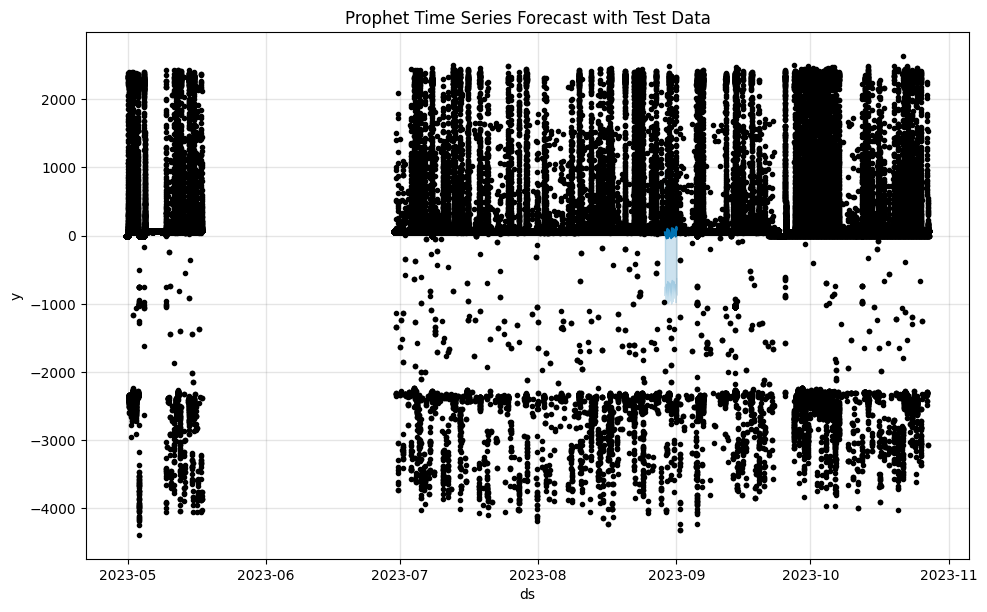

In [126]:
# Plotting the graph
fig = prophet_model.plot(test_forecast)
plt.title('Prophet Time Series Forecast with Test Data')
plt.show()

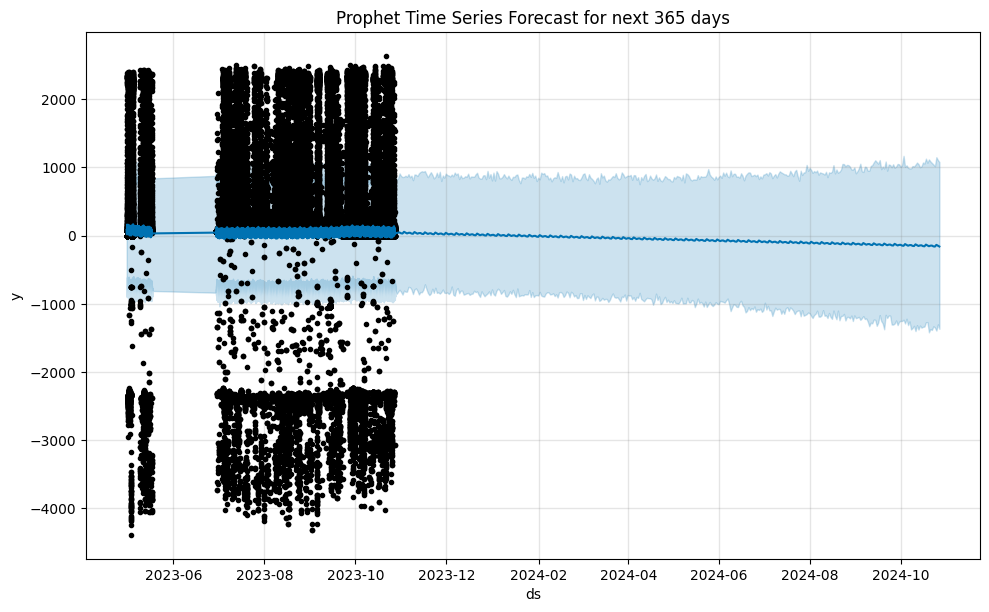

In [127]:
# Plotting the graph
fig = prophet_model.plot(forecast_365)
plt.title('Prophet Time Series Forecast for next 365 days')
plt.show()

In [128]:
y_test = prophet_test_data['y']
mae = mean_absolute_error(y_test, test_forecast['yhat'])
print(f'MAE = {mae}')

mse = mean_squared_error(y_test, test_forecast['yhat'])
print(f'MSE = {mse}')

MAE = 103.82815832946126
MSE = 146236.81953698935


# Using XGBOOST MODEL

In [129]:
# Lets encode the timestamp
from sklearn.preprocessing import LabelEncoder

# Assuming 'timestamp_column' is your timestamp column
timestamp_column = ['year', 'month', 'day', 'hour', 'minute']

label_encoder = {}

for col in timestamp_column:
    label_encoder[col] = LabelEncoder()
    test_df[col + '_encoded'] = label_encoders[col].fit_transform(test_df_encode['Timestamp'].dt.__getattribute__(col))

# Drop the original timestamp column
XGB_test_df = test_df_encode.drop('Timestamp', axis=1)
XGB_test_df.head()

,Input Power (W),Output Power (W),Grid Powerset (W),Generator Powerset (W),Battery Powerset (W),AC Consumption (W),Power Consumed (W),AC Input_Grid,AC Input_Inverting
0,2555.0,2489.0,2555.0,0.0,11.364,2489.0,66.0,True,False
1,2497.0,2436.0,2497.0,0.0,11.364,2436.0,61.0,True,False
2,2707.0,2647.0,2707.0,0.0,11.360,2647.0,60.0,True,False
3,2517.0,2455.0,2517.0,0.0,11.364,2455.0,62.0,True,False
4,2521.0,2460.0,2521.0,0.0,11.368,2460.0,61.0,True,False


In [130]:
#Define features (X) and target (y)
X_test = XGB_test_df.drop('Power Consumed (W)', axis=1)  # Features
y_test = XGB_test_df[['Power Consumed (W)']]  # Target

In [131]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [132]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE = {mae:.2f}')

MAE = 3.75


In [133]:
mse = mean_squared_error(y_test, y_pred)
print(f'MSE = {mse:.2f}')

MSE = 60.62


In [134]:
rsme = sqrt(mse)
print(f'RMSE = {rsme:.2f}')

RMSE = 7.79


# THANKS